In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fakeNewsNet.csv')

EXPLORATORY DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [4]:
df.shape

(23196, 5)

In [5]:
df['real'].value_counts()

real
1    17441
0     5755
Name: count, dtype: int64

In [6]:
df = df.filter(['title', 'real'], axis=1)

In [7]:
df['title'] = df['title'].str.lower().str.strip()

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df['title'] = df['title'].str.replace('?', '', regex=False)
df['title'] = df['title'].str.replace('.', '', regex=False)
df['title'] = df['title'].str.replace('-', ' ', regex=False)
df['title'] = df['title'].str.replace(',', '', regex=False)
df['title'] = df['title'].str.replace("'", '', regex=False)
df['title'] = df['title'].str.replace(":", '', regex=False)
df['title'] = df['title'].str.replace('"', '', regex=False)
df['title'] = df['title'].str.replace("&", '', regex=False)

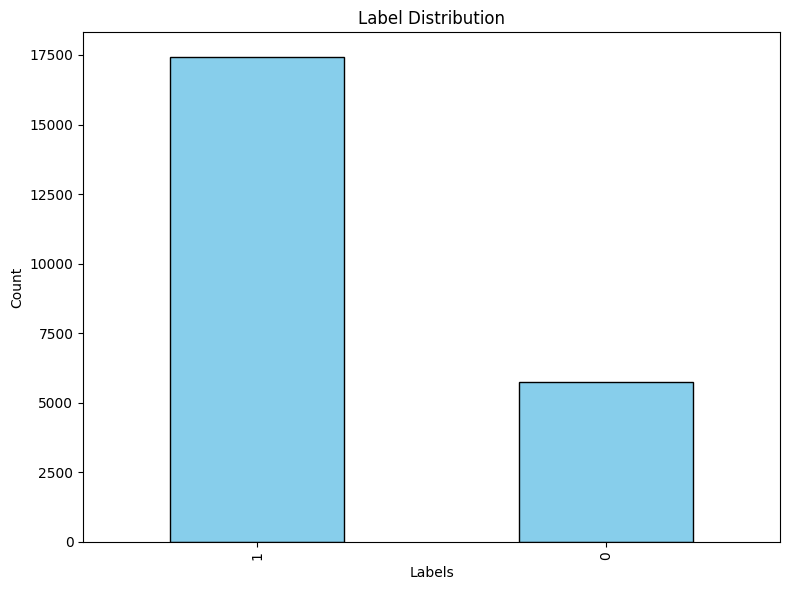

In [10]:
import matplotlib.pyplot as plt

label_counts = df['real'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot.bar(color='skyblue', edgecolor='black')

plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['title'])

y = df['real']

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
X = X_resampled
y = y_resampled

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
model.score(X_train, y_train)

0.9960580541121663

MODEL PERFORMANCE EVALUATION

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

In [21]:
y_pred = model.predict(X_test)

In [22]:
acc = accuracy_score(y_test, y_pred)
acc

0.9128565285939516

In [23]:
prec = precision_score(y_test, y_pred)
prec

0.9024458032240134

In [24]:
rec = recall_score(y_test, y_pred)
rec

0.9266552511415526

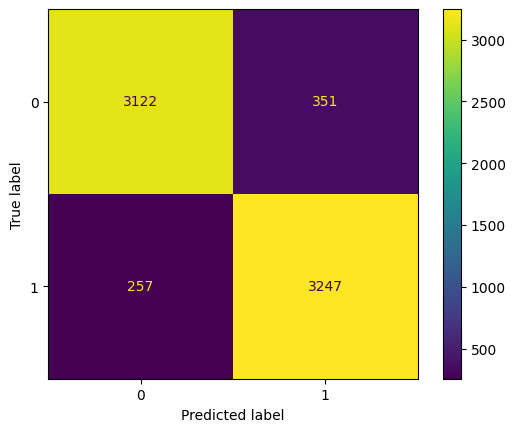

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [26]:
import joblib

In [28]:
joblib.dump(model, 'RFFN_model.joblib')

['RFFN_model.joblib']

In [29]:
joblib.dump(vectorizer, 'RFFN_vectorizer.joblib')

['RFFN_vectorizer.joblib']